# **Data Prepration for Salary Analysis for Programmers/Developers**

## Overview

In this dataset we are going to clean the varius columns and prepare our data using various methods. In the analysis section we will find relationships to the various fileds and the salary of Programmers/Developers





## **DATASET OVERVIEW**

### Importing the libraries we need into the colab env 

In [ ]:
# Importing the pandas library into our environment
import pandas as pd

# import numpy library into our environment
import numpy as np

#importing matplotlib into our environment 
import matplotlib.pyplot as plt
% matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing the dataset into our environment 

In [ ]:
dd=pd.read_csv("survey_results_public.csv")

In [ ]:
# Cheking the first 5 entries into our dataset 
dd.head(5)

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

### Checking information on our dataset 

In [ ]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

## **DATASET PREPRATION**

### Dropping Columns that we do not need into our dataset 

In [ ]:
#Dropping the columns listed in the drop section because they will not help with our analysis 

dd.drop(['Respondent','CompTotal','CurrencyDesc','CurrencySymbol',
        'DatabaseDesireNextYear','JobSeek','LanguageDesireNextYear','MiscTechDesireNextYear'],axis=1,inplace=True)

#Cheking if the columns have been dropped
dd.head(3)

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,ConvertedComp,Country,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,LanguageWorkedWith,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,I am a developer by profession,Yes,NaN,13,Monthly,NaN,Germany,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,C#;HTML/CSS;JavaScript,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,I am a developer by profession,No,NaN,19,NaN,NaN,United Kingdom,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,JavaScript;Swift,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


In [ ]:
#Dropping the columns listed in the drop section because they will not help with our analysis 
dd.drop(['MiscTechWorkedWith','NEWCollabToolsDesireNextYear','NEWDevOps','NEWDevOpsImpt','NEWJobHunt',
        'NEWJobHuntResearch','NEWOffTopic','NEWOnboardGood'],axis=1,inplace=True)

#Cheking if the columns have been dropped
dd.head(3)

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,ConvertedComp,Country,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,LanguageWorkedWith,NEWCollabToolsWorkedWith,NEWEdImpt,NEWLearn,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,I am a developer by profession,Yes,NaN,13,Monthly,NaN,Germany,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,C#;HTML/CSS;JavaScript,Confluence;Jira;Slack;Microsoft Azure;Trello,Fairly important,Once a year,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,I am a developer by profession,No,NaN,19,NaN,NaN,United Kingdom,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,JavaScript;Swift,Confluence;Jira;Github;Gitlab;Slack,Fairly important,Once a year,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,NaN,NaN,Once a decade,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


In [ ]:
#Dropping the columns listed in the drop section because they will not help with our analysis 
dd.drop(['NEWPurchaseResearch','NEWPurpleLink',
         'NEWSOSites','NEWStuck','PlatformDesireNextYear','SurveyEase','SurveyLength'],axis=1,inplace=True)

#Cheking if the columns have been dropped
dd.head(3)

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,ConvertedComp,Country,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,LanguageWorkedWith,NEWCollabToolsWorkedWith,NEWEdImpt,NEWLearn,NEWOtherComms,NEWOvertime,OpSys,OrgSize,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,I am a developer by profession,Yes,NaN,13,Monthly,NaN,Germany,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,C#;HTML/CSS;JavaScript,Confluence;Jira;Slack;Microsoft Azure;Trello,Fairly important,Once a year,No,Often: 1-2 days per week or more,Windows,2 to 9 employees,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,I am a developer by profession,No,NaN,19,NaN,NaN,United Kingdom,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,JavaScript;Swift,Confluence;Jira;Github;Gitlab;Slack,Fairly important,Once a year,No,NaN,MacOS,"1,000 to 4,999 employees",iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,NaN,NaN,Once a decade,No,NaN,Linux-based,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN


### **Checking for duplicates in our columns**

In [ ]:
# Cheking if our dataset contains any duplicate values
dd.duplicated().values.any()

True

### **Cheking for missing values in our columns**

In [ ]:
#Cheking the sum of msissing values in our columns
dd.isnull().sum()

MainBranch                    299
Hobbyist                       45
Age                         19015
Age1stCode                   6561
CompFreq                    24392
ConvertedComp               29705
Country                       389
DatabaseWorkedWith          14924
DevType                     15091
EdLevel                      7030
Employment                    607
Ethnicity                   18513
Gender                      13904
JobFactors                  15112
JobSat                      19267
LanguageWorkedWith           7083
NEWCollabToolsWorkedWith    11578
NEWEdImpt                   15996
NEWLearn                     8305
NEWOtherComms                7256
NEWOvertime                 21230
OpSys                        8233
OrgSize                     20127
PlatformWorkedWith          10618
PurchaseWhat                25097
Sexuality                   20469
SOAccount                    7656
SOComm                       7985
SOPartFreq                  17669
SOVisitFreq   

### **Taking care of missing values** 

In [ ]:
# Dropping the missing values in our convertedcomp column as it conatins the salary in usd for the survey
# also cheking if the missing values were dropped in that colunmn 
dd2= dd.dropna(how='any', subset= ['ConvertedComp'])
dd2.isnull().sum()

MainBranch                      0
Hobbyist                        0
Age                          4160
Age1stCode                     85
CompFreq                        0
ConvertedComp                   0
Country                         0
DatabaseWorkedWith           5000
DevType                       389
EdLevel                       568
Employment                     39
Ethnicity                    4598
Gender                       2629
JobFactors                   1692
JobSat                         55
LanguageWorkedWith           1309
NEWCollabToolsWorkedWith     2569
NEWEdImpt                     499
NEWLearn                     1944
NEWOtherComms                1209
NEWOvertime                   433
OpSys                        1521
OrgSize                       541
PlatformWorkedWith           2784
PurchaseWhat                 4426
Sexuality                    5388
SOAccount                    1401
SOComm                       1460
SOPartFreq                   6498
SOVisitFreq   

### **Imputing the mean for the null values in the integer columns**

In [ ]:
# imputing the mean for the null values in the age column 
dd2['Age'].fillna(dd2['Age'].mean(), inplace= True)

# imputing the mean for the null values in the work_week hours column 
dd2['WorkWeekHrs'].fillna(dd2['WorkWeekHrs'].mean(), inplace= True)


#Filling missing values in the Age1stcode column with zero
dd2["Age1stCode"].fillna(0, inplace= True)

#Filling missing values in the yearcode column with zero
dd2["YearsCode"].fillna(0, inplace= True)


#Filling missing values in the yearcodepro column with zero
dd2["YearsCodePro"].fillna(0, inplace= True)


# Cheking the sum of missing values
dd2.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


MainBranch                      0
Hobbyist                        0
Age                             0
Age1stCode                      0
CompFreq                        0
ConvertedComp                   0
Country                         0
DatabaseWorkedWith           5000
DevType                       389
EdLevel                       568
Employment                     39
Ethnicity                    4598
Gender                       2629
JobFactors                   1692
JobSat                         55
LanguageWorkedWith           1309
NEWCollabToolsWorkedWith     2569
NEWEdImpt                     499
NEWLearn                     1944
NEWOtherComms                1209
NEWOvertime                   433
OpSys                        1521
OrgSize                       541
PlatformWorkedWith           2784
PurchaseWhat                 4426
Sexuality                    5388
SOAccount                    1401
SOComm                       1460
SOPartFreq                   6498
SOVisitFreq   

### **Filling the rest of the missing values with zero and checking the sum of null values**

In [ ]:
# Creating a list of all the column names with obejcts/strings in their rows and contain null values

missing_strl = dd2[["DatabaseWorkedWith", "DevType", "EdLevel", "Employment", "Ethnicity", "Gender", "JobFactors", "JobSat",
                "LanguageWorkedWith", "NEWCollabToolsWorkedWith", "NEWEdImpt", "NEWOtherComms", "NEWOvertime", "OpSys", 
                "OrgSize", "PlatformWorkedWith", "PurchaseWhat", "Sexuality", "SOAccount", "SOComm", "SOPartFreq", "SOVisitFreq",
                "Trans", "UndergradMajor", "WebframeDesireNextYear", "WebframeWorkedWith", "WelcomeChange", "NEWLearn"]]

#Creating a for loop to iterate over the column names in missing_strl and where there is a nan value it repalces with a dot instead
for i in missing_strl:
  dd2[i].replace(np.nan, ".", inplace= True)

dd2.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,ConvertedComp,Country,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,LanguageWorkedWith,NEWCollabToolsWorkedWith,NEWEdImpt,NEWLearn,NEWOtherComms,NEWOvertime,OpSys,OrgSize,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
7,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,United States,MariaDB;MySQL;Redis,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,Remote work options;Opportunities for professi...,Slightly dissatisfied,Python;SQL,Confluence;Jira;Github;Slack;Microsoft Teams;G...,Not at all important/not necessary,Once a year,No,Occasionally: 1-2 days per quarter but less th...,Linux-based,20 to 99 employees,Docker,I have some influence,Straight / Heterosexual,Yes,"No, not really",Less than once per month or monthly,Multiple times per day,No,"Computer science, computer engineering, or sof...",Django;React.js;Vue.js,Flask,Just as welcome now as I felt last year,39.0,17,13
9,I am a developer by profession,Yes,22.0,14,Yearly,32315.0,United Kingdom,Microsoft SQL Server,"Database administrator;Developer, full-stack;D...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed full-time,White or of European descent,Man,Flex time or a flexible schedule;How widely us...,Very satisfied,HTML/CSS;Java;JavaScript;Python;SQL,Github;Microsoft Teams,Fairly important,Every few months,No,Often: 1-2 days per week or more,Windows,2 to 9 employees,Android;Linux;Raspberry Pi;Windows,I have a great deal of influence,Straight / Heterosexual,Yes,"Yes, definitely",Multiple times per day,Multiple times per day,No,Mathematics or statistics,Flask;jQuery,Flask;jQuery,Somewhat more welcome now than last year,36.0,8,4
10,I am a developer by profession,Yes,23.0,13,Yearly,40070.0,United Kingdom,Firebase;MongoDB;PostgreSQL;SQLite,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,"Flex time or a flexible schedule;Languages, fr...",Slightly dissatisfied,C#;JavaScript;Swift,Confluence;Jira;Github;Slack;Microsoft Teams;M...,Very important,Every few months,No,Rarely: 1-2 days per year or less,Windows,"10,000 or more employees",AWS;Heroku;iOS,I have little or no influence,Straight / Heterosexual,Yes,"Yes, somewhat",I have never participated in Q&A on Stack Over...,Multiple times per day,No,"Computer science, computer engineering, or sof...",Angular;Django;React.js,Angular;Angular.js;Django;React.js,Just as welcome now as I felt last year,40.0,10,2
11,I am a developer by profession,No,49.0,42,Monthly,14268.0,Spain,.,"Designer;Developer, front-end",Some college/university study without earning ...,Employed full-time,White or of European descent,Man,Remote work options;Office environment or comp...,Very dissatisfied,HTML/CSS;JavaScript,Github,Somewhat important,Once every few years,No,Rarely: 1-2 days per year or less,Windows,2 to 9 employees,Windows;WordPress,I have little or no influence,Straight / Heterosexual,Yes,"Yes, somewhat",A few times per week,Multiple times per day,No,Mathematics or statistics,ASP.NET;jQuery,ASP.NET;jQuery,Just as welcome now as I felt last year,40.0,7,7
12,"I am not primarily a developer, but I write co...",Yes,53.0,14,Monthly,38916.0,Netherlands,.,"Designer;Developer, back-end","Secondary school (e.g. American high school, G...",Employed full-time,White or of European descent,Man,Industry that I’d be working in;Financial perf...,Very satisfied,C;JavaScript;Python,.,Not at all important/not necessary,Once every few years,No,Rarely: 1-2 days per year or less,MacOS,2 to 9 employees,MacOS;Windows,I have some influence,Straight / Heterosexual,Yes,"Yes, definitely",Multiple times per day,Multiple times per day,

In [ ]:
#cheking the sum of null values after replacing 
dd2.isnull().sum()

MainBranch                  0
Hobbyist                    0
Age                         0
Age1stCode                  0
CompFreq                    0
ConvertedComp               0
Country                     0
DatabaseWorkedWith          0
DevType                     0
EdLevel                     0
Employment                  0
Ethnicity                   0
Gender                      0
JobFactors                  0
JobSat                      0
LanguageWorkedWith          0
NEWCollabToolsWorkedWith    0
NEWEdImpt                   0
NEWLearn                    0
NEWOtherComms               0
NEWOvertime                 0
OpSys                       0
OrgSize                     0
PlatformWorkedWith          0
PurchaseWhat                0
Sexuality                   0
SOAccount                   0
SOComm                      0
SOPartFreq                  0
SOVisitFreq                 0
Trans                       0
UndergradMajor              0
WebframeDesireNextYear      0
WebframeWo

### **Taking care of special characters in the dataset**

In [ ]:
# Creating a list of special characters
special_characters = ["™", "€"]

# Creating a for loop to iterate over the names in the columns
# and remove the special characters from the columns if they are found
# existing in the column
for sch in special_characters:
    dd2['EdLevel'] = dd2['EdLevel'].str.replace(sch, ' ')

#Since we replaced the special characters with a plus we might end up with double white spaces 
# we will remove the double white spaces and rejoin the words 
dd2['EdLevel']= dd2['EdLevel'].str.split().str.join(" ")


#Cheking the column to see whether the special charcters listed have been removed
dd2[["EdLevel"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,EdLevel
7,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
9,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"
10,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
11,Some college/university study without earning ...
12,"Secondary school (e.g. American high school, G..."
...,...
64142,"Secondary school (e.g. American high school, G..."
64148,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"
64152,Some college/university study without earning ...
64153,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)"


### **Dealing with our Outliers**

#### Quantile calculations

In [ ]:
Q1 = dd2.quantile(0.25)
Q3 = dd2.quantile(0.75)
IQR = Q3 - Q1

#### Cheking the sum of outliers in each column 

In [ ]:
((dd2 < (Q1 - 1.5 * IQR)) | (dd2 > (Q3 + 1.5 * IQR))).sum()

Age                          1936
Age1stCode                      0
CompFreq                        0
ConvertedComp                2301
Country                         0
DatabaseWorkedWith              0
DevType                         0
EdLevel                         0
Employment                      0
Ethnicity                       0
Gender                          0
Hobbyist                        0
JobFactors                      0
JobSat                          0
LanguageWorkedWith              0
MainBranch                      0
NEWCollabToolsWorkedWith        0
NEWEdImpt                       0
NEWLearn                        0
NEWOtherComms                   0
NEWOvertime                     0
OpSys                           0
OrgSize                         0
PlatformWorkedWith              0
PurchaseWhat                    0
SOAccount                       0
SOComm                          0
SOPartFreq                      0
SOVisitFreq                     0
Sexuality     

#### Visualising our outliers in histograms to check skewness 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6bf18d0b10>,
      dtype=object)

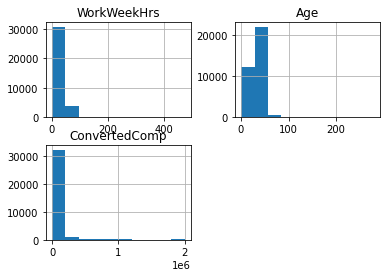

In [ ]:
dd2.hist(column = ['WorkWeekHrs', 'Age', 'ConvertedComp'])

#### **Histogram outcome of the dataset**

As we can see from the histogram obove our data is skewed right meaning that the position of most of our outliers are present on the right side of the distribution, the visialisation will not tell us the number of outlier but only the direction

#### Visualising our outliers in box plots to see the outliers 

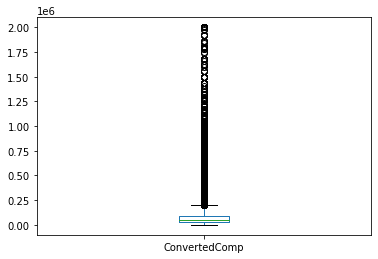

In [ ]:
#checking the number of of outliers from our salary data 
dd2.boxplot(column =['ConvertedComp'], grid=False)

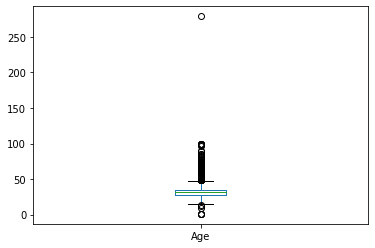

In [ ]:
#checking the number of of outliers from our age data 
dd2.boxplot(column =['Age'], grid=False)

#### Dropping specific outliers in the dataset that users are 80 years old

In [ ]:
dd2.drop(dd2[dd2['Age']>80].index,inplace=True)

#cheking the shape of our dataset after dropping
dd2.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(34741, 38)

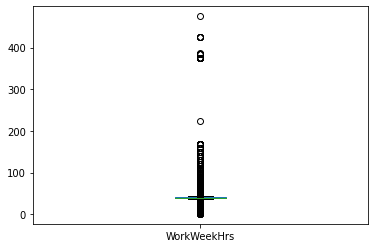

In [ ]:
#checking the number of of outliers from our salary data 
dd2.boxplot(column =['WorkWeekHrs'], grid=False)

#### Dropping specific outliers in the dataset that users work for 100 hours a week 

In [ ]:
dd2.drop(dd2[dd2['WorkWeekHrs']>100].index,inplace=True)

#cheking the shape of our dataset after dropping
dd2.shape

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(34585, 38)

#### **Outliers Outcome for the dataset**

The outliers in the three columns are very significant in-regards to our data, dropping the outliers might resort in missing out on good findings within the dataset, one of the questions we should ask our-selves is are those even outliers especially based on the analysis we are trying to compute and find, so in this case since the outliers are part of our data not dropping them might actually help with our analysis

That being said we can take two separate datasets one with dropped outliers and another without and compare them and see if we can make any conclusions



## Exporting our cleaned dataset into csv format 

In [ ]:
dd2.to_csv("survey-results-filtered.csv")